# Exploratory Data Analysis

# 1. Analysis

1. Univarient anlysis 
2. multivarient anlysis

# 2. Feature Engineering

1. Creating New columns
2. Modifying Existing ones

# 3. handling outliers

1. Detect Outliers
2. Remove Outliners


In [992]:
pip install nltk


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: C:\Users\kunde\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


## first import useful labrary

In [993]:
import pandas as pd
import numpy as np
import seaborn as se
import os
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kunde\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Import your data 

In [994]:
data= pd.read_csv("ecom.csv", encoding_errors='ignore')

## Check your data shape 

In [995]:
data.shape

(541909, 9)

## check number of columns 

In [996]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Unnamed: 8'],
      dtype='object')

## print your first 5 data 

In [997]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN


## Print last 5 data 

In [998]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,7-Dec-17,0.85,12680.0,France,NaN
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,7-Dec-17,2.10,12680.0,France,NaN
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,7-Dec-17,4.15,12680.0,France,NaN
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,7-Dec-17,4.15,12680.0,France,NaN
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,7-Dec-17,4.95,12680.0,France,NaN


## Find mean, count, standred, min, max values of every columns of dataset 

In [999]:
data.describe()

,Quantity,UnitPrice,CustomerID,Unnamed: 8
count,541909.000000,541909.000000,406829.000000,0.0
mean,9.552250,4.611114,15287.690570,NaN
std,218.081158,96.759853,1713.600303,NaN
min,-80995.000000,-11062.060000,12346.000000,NaN
25%,1.000000,1.250000,13953.000000,NaN
50%,3.000000,2.080000,15152.000000,NaN
75%,10.000000,4.130000,16791.000000,NaN
max,80995.000000,38970.000000,18287.000000,NaN


## Now we are finding data type of columns 

In [1000]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
 8   Unnamed: 8   0 non-null       float64
dtypes: float64(3), int64(1), object(5)
memory usage: 37.2+ MB


## now we are finding repetation values of element in column "Country"

In [1001]:
data["Country"].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

## By using isnull() we can find empty values or we can use notna().sum() for finding not null values 

In [1002]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Unnamed: 8     541909
dtype: int64

## Handling of missing values 

### see in last column there is lot of missing values so it is better to remove it beacuse unnamed column is not that much important and missing values is same as number of columns 

In [1003]:
data=data.drop(columns="Unnamed: 8", axis=1)

In [1004]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


### In column("Description") we are replace missing value with previous Row values 

In [1005]:
data["Description"] = data["Description"].fillna(method='ffill')

In [1006]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### In column("CustomerID") we are replace missing value with forward Row values 

In [1007]:
data["CustomerID"]=data["CustomerID"].fillna(method='bfill')

In [1008]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### check is it done or not

In [1009]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,29-Nov-16,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,29-Nov-16,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,29-Nov-16,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,29-Nov-16,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,29-Nov-16,1.69,13047.0,United Kingdom


## see in customerid column we can see there is lot of variation 

In [1010]:
data["CustomerID"].value_counts()

17841.0    8568
14911.0    7542
14096.0    6367
12748.0    5940
14156.0    3117
           ... 
13391.0       1
17923.0       1
17986.0       1
17763.0       1
16148.0       1
Name: CustomerID, Length: 4372, dtype: int64

### By using apply function we caan apply any function on our data set in below code we are using split function for count word in description 

In [1011]:
data['word_count'] = data['Description'].apply(lambda x: len(str(x).split()))

### head() and tail() both function are used for to print upper and lower 5 data

In [1012]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,word_count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom,5
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom,3
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom,5
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom,6
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom,5


## Remove stopword in Description

### Stopwords are the English words which does not add much meaning to a sentence that's why we have to remove it 

### first we have to define function to remove stopword that is follow 

In [1013]:
stopwords = stopwords.words('english')
def remove_stopwords(text):
    words = [word for word in text.split() if word.lower() not in stopwords]
    new_text = " ".join(words)
    return new_text

### After creating, we have apply this function on our data set by using apply() function   

In [1014]:
data["Description"] = data["Description"].apply(lambda x:remove_stopwords(x))

In [1015]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,word_count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom,5
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom,3
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom,5
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom,6
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom,5
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,29-Nov-16,7.65,17850.0,United Kingdom,5
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,29-Nov-16,4.25,17850.0,United Kingdom,5
7,536366,22633,HAND WARMER UNION JACK,6,29-Nov-16,1.85,17850.0,United Kingdom,4
8,536366,22632,HAND WARMER RED POLKA DOT,6,29-Nov-16,1.85,17850.0,United Kingdom,5
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,29-Nov-16,1.69,13047.0,United Kingdom,4


In [1016]:
data.shape

(541909, 9)

## conversion of str into datetime format 

### first we have check our "InvoiceDate" columns format if it is other than datetime format so we have to change it 

In [1017]:
type(data['InvoiceDate'][1]) 

str

### here we are using to_datetime function to change format 

In [1018]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [1019]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,word_count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850.0,United Kingdom,5
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850.0,United Kingdom,3
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850.0,United Kingdom,5
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850.0,United Kingdom,6
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850.0,United Kingdom,5


### Customer distribution by country

In [1020]:
country_cust_data=data[['Country','CustomerID']].drop_duplicates()

### by using below code we can say which customer form which country 

In [1021]:
country_cust_data.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

,Country,CustomerID
36,United Kingdom,4084
14,Germany,95
13,France,90
31,Spain,31
10,EIRE,31
3,Belgium,25
33,Switzerland,24
27,Portugal,20
19,Italy,15
12,Finland,12


### Validate if there are any negative values in Quantity column

In [1022]:
data.Quantity.min()

-80995

### Handling of negative values in Quantity columns (Filter out records with negative values)

In [1023]:
data = data[(data['Quantity']>0)]

In [1024]:
data.Quantity.min()

1

### check if there are any negative value in PriceUnit 

In [1025]:
data.UnitPrice.min()

-11062.06

### Handling of negative values in UnitPrice columns(Filter out records with negative values)

In [1026]:
data = data[(data['UnitPrice']>0)]

In [1027]:
data.UnitPrice.min()

0.001

### add new one columns which is total amount which spend by customer 

In [1028]:
data['TotalAmount'] = data['Quantity'] * data['UnitPrice']

In [1029]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,word_count,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850.0,United Kingdom,5,15.30
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850.0,United Kingdom,3,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850.0,United Kingdom,5,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850.0,United Kingdom,6,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850.0,United Kingdom,5,20.34


# try to convert this string data into numerical form 

### see in below code we are change our Country name into number beacuse number data is very sutable for understanding for machine 

### first we are using unique function to find unique values in column("Country") then creat dictonry which directly put on replace function for changing the country name to numerical data 

In [1030]:
dic = {}
for i,k in enumerate(data["Country"].unique()):
    dic[k]=i
print(dic)

{'United Kingdom': 0, 'France': 1, 'Australia': 2, 'Netherlands': 3, 'Germany': 4, 'Norway': 5, 'EIRE': 6, 'Switzerland': 7, 'Spain': 8, 'Poland': 9, 'Portugal': 10, 'Italy': 11, 'Belgium': 12, 'Lithuania': 13, 'Japan': 14, 'Iceland': 15, 'Channel Islands': 16, 'Denmark': 17, 'Cyprus': 18, 'Sweden': 19, 'Finland': 20, 'Austria': 21, 'Bahrain': 22, 'Israel': 23, 'Greece': 24, 'Hong Kong': 25, 'Singapore': 26, 'Lebanon': 27, 'United Arab Emirates': 28, 'Saudi Arabia': 29, 'Czech Republic': 30, 'Canada': 31, 'Unspecified': 32, 'Brazil': 33, 'USA': 34, 'European Community': 35, 'Malta': 36, 'RSA': 37}


In [1031]:
data.replace({"Country":dic}, inplace=True)

In [1032]:
data["Country"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37], dtype=int64)

In [1033]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,word_count,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850.0,0,5,15.30
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850.0,0,3,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850.0,0,5,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850.0,0,6,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850.0,0,5,20.34


# cohort Analysis

#### Cohort Analysis is a very useful and relatively simple technique that helps in getting valuable insights about the behavior of any business’ customers/users. In this first we are drop less important columns from dataset then we are predict and visualize customer behavior by using barplot and ggplot. 

In [1034]:
data = data.drop(columns=["InvoiceNo", "StockCode", "Description", "Country","word_count"], axis=1)

In [1035]:
data_1 = data

In [1036]:
data.head(10)

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalAmount
0,6,2016-11-29,2.55,17850.0,15.30
1,6,2016-11-29,3.39,17850.0,20.34
2,8,2016-11-29,2.75,17850.0,22.00
3,6,2016-11-29,3.39,17850.0,20.34
4,6,2016-11-29,3.39,17850.0,20.34
5,2,2016-11-29,7.65,17850.0,15.30
6,6,2016-11-29,4.25,17850.0,25.50
7,6,2016-11-29,1.85,17850.0,11.10
8,6,2016-11-29,1.85,17850.0,11.10
9,32,2016-11-29,1.69,13047.0,54.08


### here we can see datatype of every columns by this we can change our columns datatype according to our use 

In [1037]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530104 entries, 0 to 541908
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Quantity     530104 non-null  int64         
 1   InvoiceDate  530104 non-null  datetime64[ns]
 2   UnitPrice    530104 non-null  float64       
 3   CustomerID   530104 non-null  float64       
 4   TotalAmount  530104 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 24.3 MB


### we have to convert this customer id datatype(float64) into (int) by using function astype()

In [1038]:
data["CustomerID"] = data["CustomerID"].astype(int)

### now check new datatype of columns 

In [1039]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530104 entries, 0 to 541908
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Quantity     530104 non-null  int64         
 1   InvoiceDate  530104 non-null  datetime64[ns]
 2   UnitPrice    530104 non-null  float64       
 3   CustomerID   530104 non-null  int32         
 4   TotalAmount  530104 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1)
memory usage: 22.2 MB


### Now we have to find max date of dataset and min date of data set for that we have to first sort data according to CustomerID and InvoiceDate

In [1040]:
data=data.sort_values(["CustomerID", "InvoiceDate"])

### After sorting we have to group this data according to CustomerID By using function Groupby() but we are using first data of every customer so it will gives only one date and one value of unitprice and Quantity also 

In [1041]:
first_purchase = data.groupby("CustomerID").first()

In [1042]:
first_purchase

,Quantity,InvoiceDate,UnitPrice,TotalAmount
CustomerID,,,,
12346,74215,2017-01-16,1.04,77183.60
12347,12,2016-12-05,2.10,25.20
12348,72,2016-12-14,0.55,39.60
12349,2,2017-11-19,7.50,15.00
12350,12,2017-01-31,2.10,25.20
...,...,...,...,...
18280,3,2017-03-05,7.90,23.70
18281,12,2017-06-10,0.42,5.04
18282,1,2017-08-03,12.75,12.75


### below we will find min date of purchase by using min() function 

In [1043]:
first_purchase["InvoiceDate"].min()

Timestamp('2016-11-29 00:00:00')

### below we will find max date of purchase by using max() function

In [1044]:
first_purchase["InvoiceDate"].max()

Timestamp('2017-12-07 00:00:00')

# Visualize: All Purchase within COHORT
### In this Visualization we will anlysis data with in above two date 

### In this section we are Visualize Customer Quantity with respective Date 

In [1045]:
first_purchase

,Quantity,InvoiceDate,UnitPrice,TotalAmount
CustomerID,,,,
12346,74215,2017-01-16,1.04,77183.60
12347,12,2016-12-05,2.10,25.20
12348,72,2016-12-14,0.55,39.60
12349,2,2017-11-19,7.50,15.00
12350,12,2017-01-31,2.10,25.20
...,...,...,...,...
18280,3,2017-03-05,7.90,23.70
18281,12,2017-06-10,0.42,5.04
18282,1,2017-08-03,12.75,12.75


### we are plot bar garph between Date and UnitPrice By using this we will analysis how many money we got in a day or in month

### first we have to sort date according to a day or a months 

### In below cell we will reseting index 

In [1046]:
first_purchase.reset_index(level =['CustomerID'], inplace = True)

In [1047]:
first_purchase

,CustomerID,Quantity,InvoiceDate,UnitPrice,TotalAmount
0,12346,74215,2017-01-16,1.04,77183.60
1,12347,12,2016-12-05,2.10,25.20
2,12348,72,2016-12-14,0.55,39.60
3,12349,2,2017-11-19,7.50,15.00
4,12350,12,2017-01-31,2.10,25.20
...,...,...,...,...,...
4339,18280,3,2017-03-05,7.90,23.70
4340,18281,12,2017-06-10,0.42,5.04
4341,18282,1,2017-08-03,12.75,12.75
4342,18283,1,2017-01-04,0.85,0.85


### import useful labrary here 

In [1048]:
import matplotlib.pyplot as plt
import seaborn as sns 

### we will plot bar plot by using seaborn 

### first we will plot bargraph between Date and Unitprice for more clear anlysis we are taking only first 10 data if we took then it is not clearly visible 

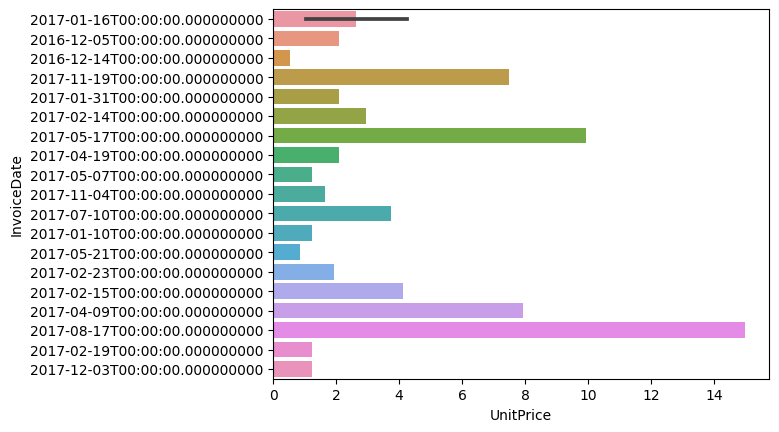

In [1049]:
sns.barplot(y ='InvoiceDate', x ='UnitPrice', data =first_purchase.iloc[:20])
plt.show()

### Now we are ploting bar graph between CustomerID and Unitprice 

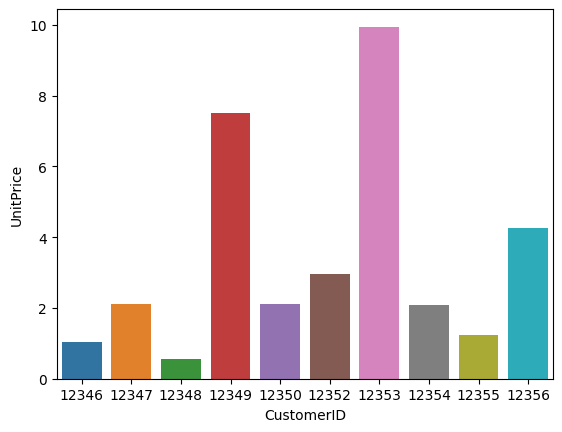

In [1050]:
sns.barplot(x ='CustomerID', y ='UnitPrice', data =first_purchase.iloc[:10])
plt.show()

### After changeing the index we have to put index as our "Invoicedate" column as index 

In [1051]:
first_purchase.set_index(['InvoiceDate'], inplace = True)

In [1052]:
first_purchase

,CustomerID,Quantity,UnitPrice,TotalAmount
InvoiceDate,,,,
2017-01-16,12346,74215,1.04,77183.60
2016-12-05,12347,12,2.10,25.20
2016-12-14,12348,72,0.55,39.60
2017-11-19,12349,2,7.50,15.00
2017-01-31,12350,12,2.10,25.20
...,...,...,...,...
2017-03-05,18280,3,7.90,23.70
2017-06-10,18281,12,0.42,5.04
2017-08-03,18282,1,12.75,12.75


### In below cell we are sorting value accoreding to monthly bases 
### in below we can find monthly anlysis of UnitPrice sum

In [1053]:
 first_purchase["UnitPrice"].resample("M").sum()

InvoiceDate
2016-11-30      918.38
2016-12-31    17337.59
2017-01-31     2208.66
2017-02-28     1535.26
2017-03-31     2326.74
2017-04-30     1086.08
2017-05-31     1361.41
2017-06-30     2816.33
2017-07-31     2169.94
2017-08-31      708.68
2017-09-30     3229.77
2017-10-31     1977.76
2017-11-30     1233.73
2017-12-31      125.04
Freq: M, Name: UnitPrice, dtype: float64

### now we are ploting line graph that will gives variation between date and unitprice 

<AxesSubplot: xlabel='InvoiceDate'>

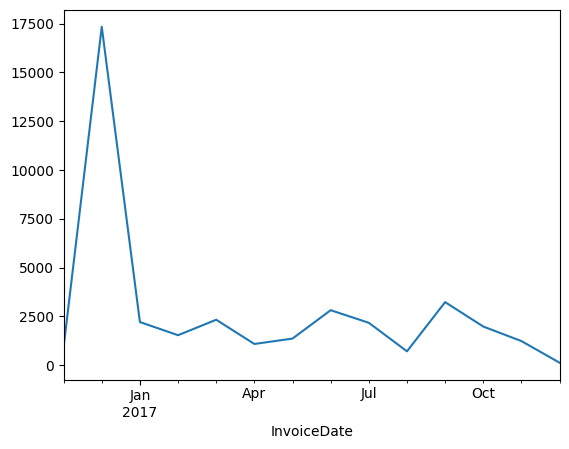

In [1054]:
#plot graph  
first_purchase["UnitPrice"].resample("M").sum().plot()

# Visualize: Individual Customer Purchase 
### now we will anlysis data but individual customer not in group of customer 

### first we are finding unique customerID 

In [1055]:
ind = data_1["CustomerID"].unique()

In [1056]:
ind

array([17850, 13047, 12583, ..., 13298, 14569, 12713])

### In below cell we will get first 10 ides 

In [1057]:
ides_selected = ind[0:10]

In [1058]:
ides_selected

array([17850, 13047, 12583, 13748, 15100, 15291, 14688, 17809, 15311,
       16098])

### In below cell we are finding our first 10 customer Id with its data from other columns 

In [1059]:
customer_new = data_1[data_1["CustomerID"].isin(ides_selected)]

In [1060]:
customer_new

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalAmount
0,6,2016-11-29,2.55,17850,15.30
1,6,2016-11-29,3.39,17850,20.34
2,8,2016-11-29,2.75,17850,22.00
3,6,2016-11-29,3.39,17850,20.34
4,6,2016-11-29,3.39,17850,20.34
...,...,...,...,...,...
541746,96,2017-12-07,0.69,15311,66.24
541747,48,2017-12-07,1.85,15311,88.80
541748,24,2017-12-07,3.39,15311,81.36
541749,1,2017-12-07,0.21,15311,0.21


### In below cell we will Group our above data on basis of CustomerID and InvoiceDate columns by using groupby() function 

In [1061]:
cust = customer_new.groupby(["CustomerID", "InvoiceDate"]).sum()

### after Grouping data we will reset index by using reset_index() function

In [1062]:
cust_1 =cust.reset_index()

In [1063]:
cust_1

,CustomerID,InvoiceDate,Quantity,UnitPrice,TotalAmount
0,12583,2016-11-29,449,55.29,855.86
1,12583,2017-01-05,491,67.19,730.16
2,12583,2017-02-08,454,28.71,321.56
3,12583,2017-03-09,325,94.95,712.85
4,12583,2017-05-21,306,43.85,421.96
...,...,...,...,...,...
169,17809,2017-10-08,40,7.08,283.20
170,17809,2017-10-12,1046,29.99,1835.60
171,17809,2017-11-21,228,24.05,436.40
172,17850,2016-11-29,474,334.76,1499.34


### now by using ggplot we will plot line plot between three columns ("InvoiceDate", "Unitprice", "CustomerID")

### this is also important to know why we are using ggplot other than seaborn or matplotlib beacuse it will gives graph between three varible at a time and also very suitable to visualize 

### below cell showing you step by step procedure of ploting of line plot between three different columns in one graph 

### first we will import labrary and define graph by using ggplot() and aes() function 

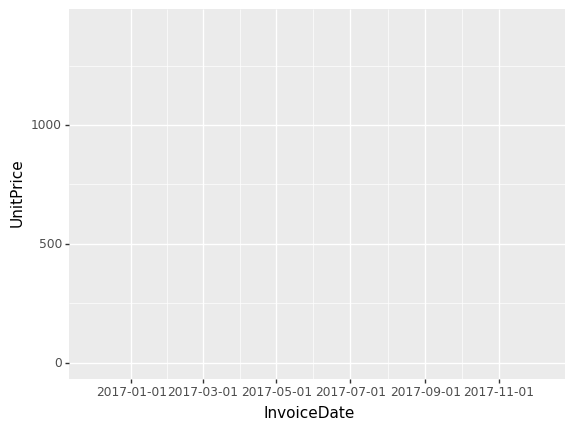

<ggplot: (137493166317)>

In [1064]:
import plotnine as pn
from plotnine import ggplot, aes
ggplot(cust_1) + aes(x="InvoiceDate", y="UnitPrice",group = "CustomerID")

### in below cell we will add one more function for ploting line that is pn.geom_lin()

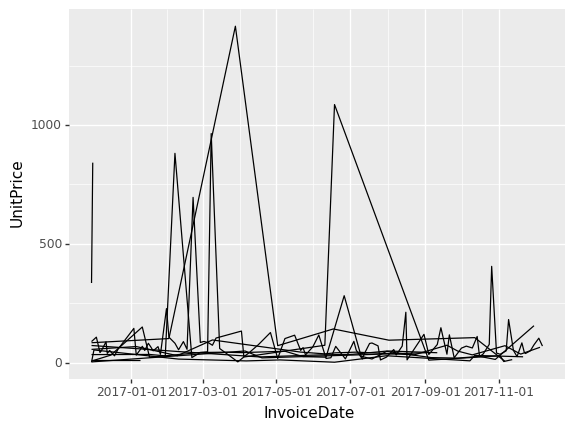

<ggplot: (137532674281)>

In [1065]:
ggplot(cust_1) + aes(x="InvoiceDate", y="UnitPrice",group = "CustomerID") + pn.geom_line()

### In next step we will add dot point in our data to more clarification by using function pn.geom_poitn()

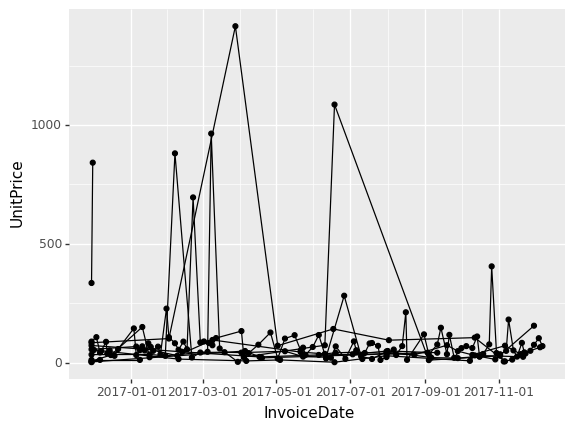

<ggplot: (137601168161)>

In [1066]:
ggplot(cust_1) + aes(x="InvoiceDate", y="UnitPrice",group = "CustomerID") + pn.geom_line() + pn.geom_point()

### now we will divide this graph according to CustomerId By using function pn.facet_wrap()

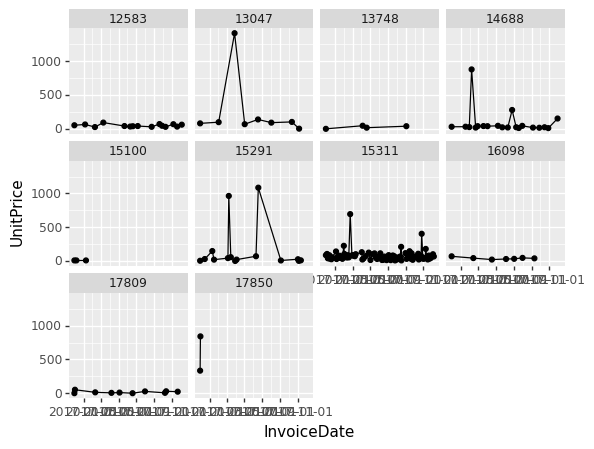

<ggplot: (137601039197)>

In [1067]:
ggplot(cust_1) + aes(x="InvoiceDate", y="UnitPrice",group = "CustomerID") + pn.geom_line() + pn.geom_point() + pn.facet_wrap('CustomerID')

### now we are convert date into year by using scale_x_date() function  

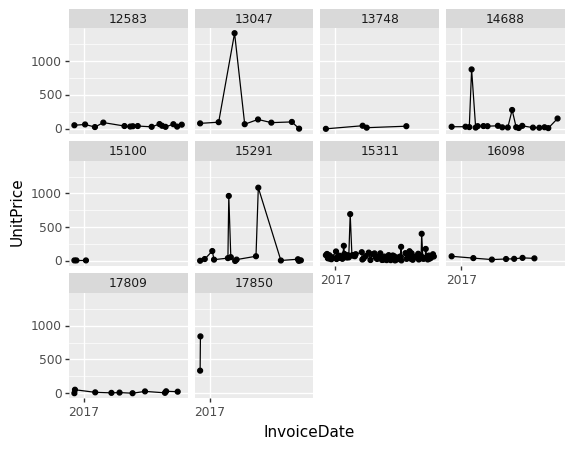

<ggplot: (137699725801)>

In [1068]:
ggplot(cust_1) + aes(x="InvoiceDate", y="UnitPrice",group = "CustomerID") + pn.geom_line() + pn.geom_point() + pn.facet_wrap('CustomerID')+ pn.scale_x_date( date_breaks='1 year', date_labels = "%Y")

# Customer Segmentation Using RFM Analysis
## RFM Features
#### (Recency, Frequency, Monetary Value) In data science, we call in Features engineering

### Why RFM model why not others
#### RFM models are commonly used in marketing to identify the best customers in order to target them with specific campaigns. A successful RFM campaign targets products to consumers who have indicated an interest in those products (that is, customers who have purchased those products or indicated they would be).
#### Note that the model also has filters to only target customers who are new; meaning that the marketing campaigns must be fairly targeted. In other words, campaigns that target new customers must be relevant to them.
#### RFM models can also be used for forecasting and planning purposes. Take for example a company that manufactures mobile phones: one could use the RFM model to forecast what types of new models to introduce in the future, based on their “revenue lift”.
#### Make target from out data set¶
#### now we will find before 90 days from now which customer made purchase and also we will find how much unitprice that constomer made

In [1069]:
#max date of dataset 
max_date = data["InvoiceDate"].max()
max_date

Timestamp('2017-12-07 00:00:00')

### For recency we need only CustomerId And date columns

### For recency we need only CustomerId And date columns 

In [1070]:
temporal_data_in_1 = data[["CustomerID", "InvoiceDate"]]

In [1071]:
temporal_data_in_1

,CustomerID,InvoiceDate
61619,12346,2017-01-16
14938,12347,2016-12-05
14939,12347,2016-12-05
14940,12347,2016-12-05
14941,12347,2016-12-05
...,...,...
392752,18287,2017-10-10
392753,18287,2017-10-10
423939,18287,2017-10-26
423940,18287,2017-10-26


### After sepration of data we have to group this data on basis of CustomerID 

In [1072]:
temporal_data_in_2 = temporal_data_in_1.groupby("CustomerID")

In [1073]:
temporal_data_in_2

### In below cell we have to find recency by using simple formula (date-max_date) 

In [1074]:
#actually recency means customer purchase lag period like recency is more customer is not live in purchase 
#actually (recency==min) is better for us 
temporal_data_in_3 = temporal_data_in_2.apply(lambda x: (max_date-x["InvoiceDate"].max())/ pd.to_timedelta(1, "day"))

In [1075]:
temporal_data_in_3

CustomerID
12346    325.0
12347      2.0
12348     75.0
12349     18.0
12350    310.0
         ...  
18280    277.0
18281    180.0
18282      7.0
18283      3.0
18287     42.0
Length: 4344, dtype: float64

In [1076]:
temporal_data_in_4 = temporal_data_in_3.to_frame()

### now we will give name to the column as recency 

In [1077]:
temporal_data_in_5 = temporal_data_in_4.set_axis(["Recency"], axis=1)

In [1078]:
temporal_data_in_5

,Recency
CustomerID,
12346,325.0
12347,2.0
12348,75.0
12349,18.0
12350,310.0
...,...
18280,277.0
18281,180.0
18282,7.0


## Frequancy feature 

### Frequency: How often a customer makes a purchase.

### Now we have to find frequency of customerId It can calculat by using Gropby() funcytion

In [1079]:
temporal_data_in_11 = data[["CustomerID", "InvoiceDate"]]

In [1080]:
temporal_data_in_12 = temporal_data_in_11.groupby("CustomerID").count()

In [1081]:
temporal_data_in_12

,InvoiceDate
CustomerID,
12346,1
12347,182
12348,31
12349,73
12350,17
...,...
18280,10
18281,7
18282,12


### now we have to give name of new column as frequency 

In [1082]:
temporal_data_in_13=temporal_data_in_12.set_axis(["Frequency"], axis=1)

In [1083]:
temporal_data_in_13

,Frequency
CustomerID,
12346,1
12347,182
12348,31
12349,73
12350,17
...,...
18280,10
18281,7
18282,12


## Monetary feature 

### Monetary Value: How much money a customer spends on purchases

### this is very easy to calculate we have to find sum of Unitprice of every customerID as well as mean of unitprice 

### here we can use three main function as Grupby()(this is used to group the customerID), Aggregate()(This is used to find sum and mean simultaneously) and set_axis()(This is used to reset name of columns )

In [1084]:
temporal_data_in_21 = data.groupby("CustomerID")

In [1085]:
temporal_data_in_21

In [1086]:
temporal_data_in_22 = temporal_data_in_21.aggregate({"TotalAmount": ("sum")})

In [1087]:
temporal_data_in_23 = temporal_data_in_22.set_axis(["Monetary"], axis=1)

In [1088]:
temporal_data_in_23

,Monetary
CustomerID,
12346,77183.60
12347,4310.00
12348,1797.24
12349,1757.55
12350,334.40
...,...
18280,180.60
18281,80.82
18282,178.05


# All Three feature of RFM

### now we will concet or merge this data in one dataset (in this step we will merge three feature of RFM adn also our unitprice spend before 90days dataset)

In [1089]:
feature_data = pd.concat((temporal_data_in_5,temporal_data_in_13 ,temporal_data_in_23), axis=1)

In [1090]:
feature_data

,Recency,Frequency,Monetary
CustomerID,,,
12346,325.0,1,77183.60
12347,2.0,182,4310.00
12348,75.0,31,1797.24
12349,18.0,73,1757.55
12350,310.0,17,334.40
...,...,...,...
18280,277.0,10,180.60
18281,180.0,7,80.82
18282,7.0,12,178.05


#### Descriptive Statistics (Recency)

In [1091]:
feature_data.Recency.describe()

count    4344.000000
mean       92.229282
std       100.138966
min         0.000000
25%        17.000000
50%        50.000000
75%       142.000000
max       373.000000
Name: Recency, dtype: float64

#### Recency distribution plot

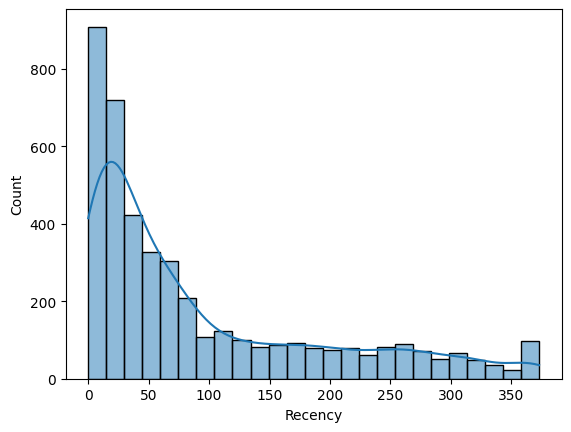

In [1092]:
import seaborn as sns
import matplotlib.pyplot as plt 

x = feature_data['Recency']
sns.histplot(x, kde = True)
plt.show()

#### Descriptive Statistics (Frequency)

In [1093]:
feature_data.Frequency.describe()

count    4344.000000
mean      122.031308
std       295.173218
min         1.000000
25%        18.000000
50%        45.000000
75%       120.000000
max      8401.000000
Name: Frequency, dtype: float64

#### Frequency distribution plot, taking observations which have frequency less than 1000

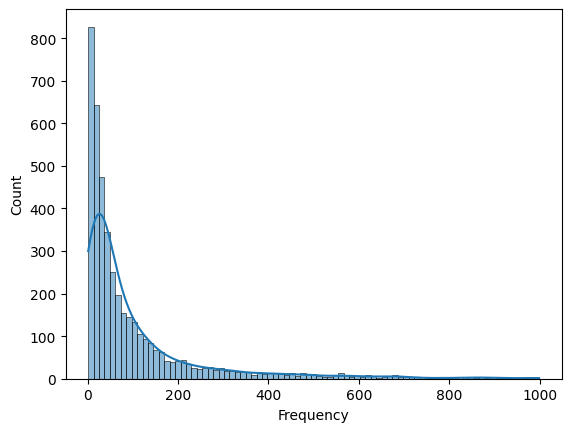

In [1094]:
x = feature_data.query('Frequency < 1000')['Frequency']
sns.histplot(x, kde = True)
plt.show()

#### Descriptive Statistics (Monetary)

In [1095]:
feature_data.Monetary.describe()

count      4344.000000
mean       2455.498284
std        9519.072739
min           6.200000
25%         312.807500
50%         713.090000
75%        1988.227500
max      280251.350000
Name: Monetary, dtype: float64

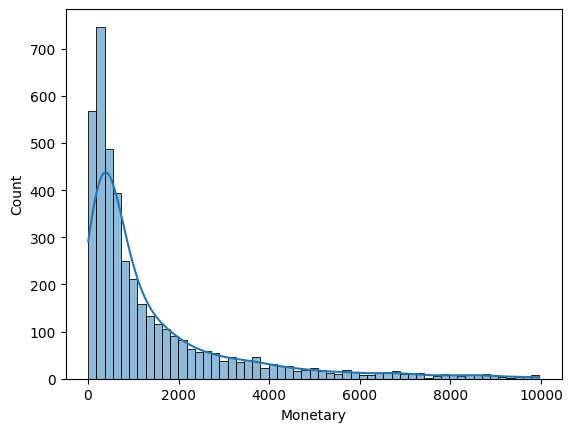

In [1096]:
#Monateray distribution plot, taking observations which have monetary value less than 10000
x = feature_data.query('Monetary < 10000')['Monetary']

sns.histplot(x, kde=True)
plt.show()

#### Split into four segments using quantiles In below cell we will divide enter data into 4 different group  

In [1097]:
quantiles = feature_data.quantile(q=[0.25,0.5,0.75])
# here we will convert into dictonry form 
quantiles = quantiles.to_dict()

In [1098]:
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'Frequency': {0.25: 18.0, 0.5: 45.0, 0.75: 120.0},
 'Monetary': {0.25: 312.8075, 0.5: 713.0899999999999, 0.75: 1988.2275}}

#### Functions to create R, F and M segments

In [1099]:
#below we will creat two function which will give four different values for R, F, M 
#first function will give value of R
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
#this second function eill give value of F and M 
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

#### Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values

#### lower value of R good customer we can say and high value of F and M that is also Good customer 

#### In below cell we will use args() and apply function to manage and apply above function on Recency, Frequency and Monetary columns 

In [1100]:
feature_data['R'] = feature_data['Recency'].apply(RScoring, args=('Recency',quantiles,))

In [1101]:
feature_data['F'] = feature_data['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))

In [1102]:
feature_data['M'] = feature_data['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))

In [1103]:
feature_data.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346,325.0,1,77183.60,4,4,1
12347,2.0,182,4310.00,1,1,1
12348,75.0,31,1797.24,3,3,2
12349,18.0,73,1757.55,2,2,2
12350,310.0,17,334.40,4,4,3


#### Calculate and Add RFMGroup value column showing combined concatenated score of RFM

#### In below cell we will marge Three columns R, F & M but like string merge so it will give RFMGroup 

In [1104]:
feature_data['RFMGroup'] = feature_data.R.map(str) + feature_data.F.map(str) + feature_data.M.map(str)

#### Calculate and Add RFMScore value column showing total sum of RFMGroup values
##### The RFM score represents the value you give to each variable used in an RFM analysis: recency, frequency, and monetary value. The RFM score is a numerical score that helps you recognize all types of customers, from the best to the worst.

In [1105]:
feature_data['RFMScore'] = feature_data[['R', 'F', 'M']].sum(axis = 1)
feature_data.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346,325.0,1,77183.60,4,4,1,441,9
12347,2.0,182,4310.00,1,1,1,111,3
12348,75.0,31,1797.24,3,3,2,332,8
12349,18.0,73,1757.55,2,2,2,222,6
12350,310.0,17,334.40,4,4,3,443,11


#### Assign Loyalty Level to each customer or WE CAN FIND WHICH CUSTOMER  IS VIP

In [1106]:
#we will divide our Loyalty level of cutomer into 4 categories 
Loyalty_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']
# we will find scorecut on basis of pandas function that is qcut() this is divide our RFMscore into 4 categories which already given in Loyalty_level
Score_cuts = pd.qcut(feature_data.RFMScore, q = 4, labels = Loyalty_Level)
#now creat new column in our dataset 
feature_data['RFM_Loyalty_Level'] = Score_cuts.values
#for checking print data 
feature_data.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,12346,325.0,1,77183.60,4,4,1,441,9,Silver
1,12347,2.0,182,4310.00,1,1,1,111,3,Platinum
2,12348,75.0,31,1797.24,3,3,2,332,8,Gold
3,12349,18.0,73,1757.55,2,2,2,222,6,Gold
4,12350,310.0,17,334.40,4,4,3,443,11,Bronze


#### Validate the data for RFMGroup = 111
#### this score cutomer are good for us we can offer them new product we can say in next cell such customer which have RFMScore=3

In [1107]:
feature_data[feature_data['RFMGroup']=='111'].sort_values('Monetary', ascending=False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,14646,1.0,2079,280251.35,1,1,1,111,3,Platinum
1,18102,0.0,999,266950.79,1,1,1,111,3,Platinum
2,17450,8.0,337,194550.79,1,1,1,111,3,Platinum
3,14911,1.0,7278,161909.39,1,1,1,111,3,Platinum
4,14156,9.0,3093,132124.68,1,1,1,111,3,Platinum
5,17511,2.0,1337,94579.62,1,1,1,111,3,Platinum
6,14096,4.0,6345,75467.87,1,1,1,111,3,Platinum
7,13694,3.0,849,67868.30,1,1,1,111,3,Platinum
8,16684,4.0,277,66653.56,1,1,1,111,3,Platinum
9,15311,0.0,2633,66139.74,1,1,1,111,3,Platinum


In [1108]:
pip install chart_studio

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: C:\Users\kunde\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


#### import somelabrary we can use it for ploting graphs 

In [1109]:
import chart_studio as cs
import plotly.offline as po
import plotly.graph_objs as gobj

### Recency Vs Frequency

In [1110]:
#now we are ploting scatter plot between Recency and frquency by using plotly (there are two function in plotly such as offline and graph_objs)
# we are takeing only data below 50000 and for frequency less than 2000
graph = feature_data.query("Monetary < 50000 and Frequency < 2000")

plot_data = [
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Bronze'")['Recency'], # this is our X-axis 
        y=graph.query("RFM_Loyalty_Level == 'Bronze'")['Frequency'], # this is our y-axis 
        mode='markers', # This is are some extra functionality of plotly 
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),  #below code for silver customer 
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Silver'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Silver'")['Frequency'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green', # this is colour for silver 
            opacity= 0.5
           )
    ),# below code for gold customer 
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Gold'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Gold'")['Frequency'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red', # this is color for gold 
            opacity= 0.9
           )
            ),
    gobj.Scatter( # below code for platinum 
        x=graph.query("RFM_Loyalty_Level == 'Platinum'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Platinum'")['Frequency'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black', #this is color for platinum
            opacity= 0.9
           )
    ),
]
#below we are gi
plot_layout = gobj.Layout(
        yaxis= {'title': "Frequency"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

### Frequency Vs Monetary

In [1111]:
#now we are ploting scatter plot between Monetary and frquency by using plotly (there are two function in plotly such as offline and graph_objs)
# we are takeing only data below 50000 and for frequency less than 2000
graph = feature_data.query("Monetary < 50000 and Frequency < 2000")

plot_data = [ #color and other function for different loyalty is same as previous 
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Bronze'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Bronze'")['Monetary'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Silver'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Silver'")['Monetary'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Gold'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Gold'")['Monetary'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Platinum'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Platinum'")['Monetary'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Monetary"},
        xaxis= {'title': "Frequency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)


### Recency Vs Monetary

In [1112]:
#now we are ploting scatter plot between Monetary and frquency by using plotly (there are two function in plotly such as offline and graph_objs)
# we are takeing only data below 50000 and for frequency less than 2000graph = feature_data.query("Monetary < 50000 and Frequency < 2000")

plot_data = [
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Bronze'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Bronze'")['Monetary'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Silver'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Silver'")['Monetary'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Gold'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Gold'")['Monetary'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
            ),
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Platinum'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Platinum'")['Monetary'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Monetary"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

# K-Means Clustering

#### It is an iterative algorithm that divides the unlabeled dataset into k different clusters in such a way that each dataset belongs only one group that has similar properties.
#### It allows us to cluster the data into different groups and a convenient way to discover the categories of groups in the unlabeled dataset on its own without the need for any training.
#### It is a centroid-based algorithm, where each cluster is associated with a centroid. The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.

### Normalization of data 

#### Handle negative and zero values so as to handle infinite numbers during log transformation

In [1113]:
#here we are creating small function which will convert neagtive value into positive values  
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num

#### Apply handle_neg_n_zero function to Recency and Monetary columns 

In [1114]:
feature_data['Recency'] = [handle_neg_n_zero(x) for x in feature_data.Recency]
feature_data['Monetary'] = [handle_neg_n_zero(x) for x in feature_data.Monetary]

#### Perform Log transformation to bring data into normal or near normal distribution

In [1115]:
import numpy as np 

#### here we will use numpy function log and also round this value upto three digit by using round() function 

In [1116]:
Log_Tfd_Data = feature_data[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

### Data distribution after data normalization for Recency

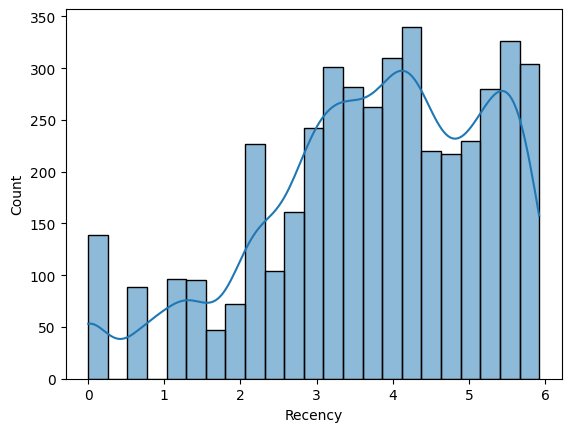

In [1117]:
Recency_Plot = Log_Tfd_Data['Recency']
ax = sns.histplot(Recency_Plot, kde=True)

### Data distribution after data normalization for Frequency

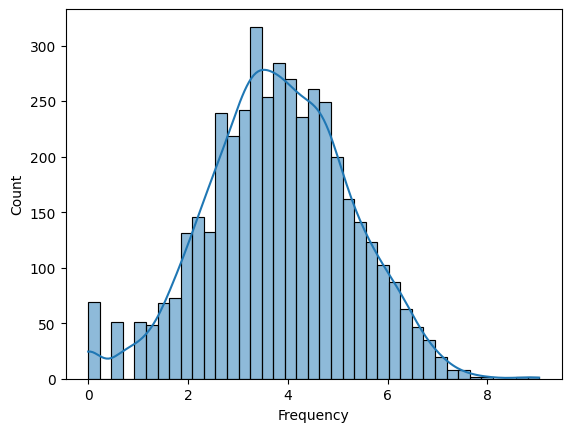

In [1118]:
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
ax = sns.histplot(Frequency_Plot, kde=True)

### Data distribution after data normalization for Monetary

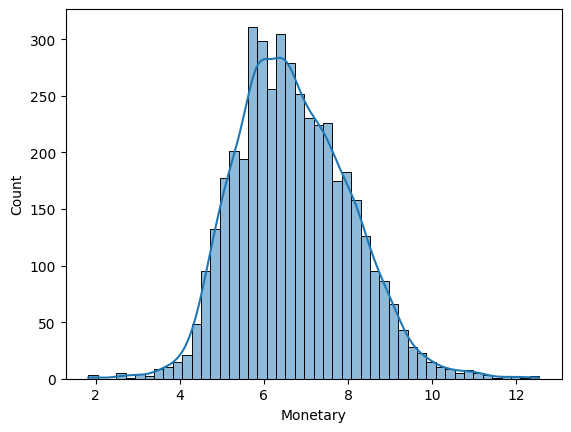

In [1119]:
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
ax = sns.histplot(Monetary_Plot, kde=True)

In [1120]:
from sklearn.preprocessing import StandardScaler

#### Bring the data on same scale

In [1121]:
scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(Log_Tfd_Data)

#### Transform it back to dataframe

In [1122]:
Scaled_Data = pd.DataFrame(Scaled_Data, index = feature_data.index, columns = Log_Tfd_Data.columns)

#### import kmeans form labrary sklearn 

In [1123]:
from sklearn.cluster import KMeans

In [1124]:
#### 

In [1125]:
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(Scaled_Data)
    sum_of_sq_dist[k] = km.inertia_

#### Plot the graph for the sum of square distance values and Number of Clusters

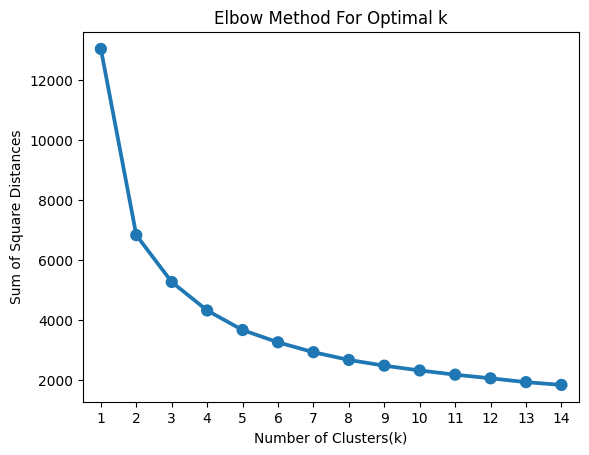

In [1126]:
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#### Perform K-Mean Clustering or build the K-Means clustering model

In [1127]:
KMean_clust = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(Scaled_Data)

KMeans(max_iter=1000, n_clusters=3)

#### Find the clusters for the observation given in the dataset

In [1128]:
feature_data['Cluster'] = KMean_clust.labels_
feature_data.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster
CustomerID,,,,,,,,,,
12346,325.0,1,77183.60,4,4,1,441,9,Silver,0
12347,2.0,182,4310.00,1,1,1,111,3,Platinum,1
12348,75.0,31,1797.24,3,3,2,332,8,Gold,0
12349,18.0,73,1757.55,2,2,2,222,6,Gold,0
12350,310.0,17,334.40,4,4,3,443,11,Bronze,2


In [1129]:
plt.figure(figsize=(7,7))

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

### Scatter Plot Frequency Vs Recency

In [1130]:
Colors = ["red", "green", "blue"]
feature_data['Color'] = feature_data['Cluster'].map(lambda p: Colors[p])

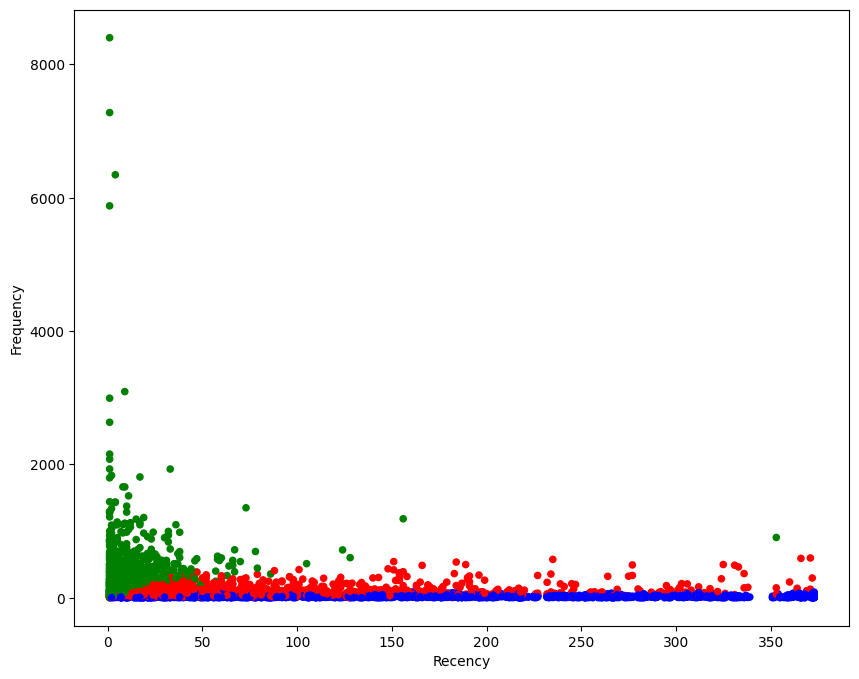

In [1131]:
ax = feature_data.plot(    
    kind="scatter", 
    x="Recency", y="Frequency",
    figsize=(10,8),
    c = feature_data['Color']
)

In [1132]:
feature_data.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster,Color
CustomerID,,,,,,,,,,,
12346,325.0,1,77183.60,4,4,1,441,9,Silver,0,red
12347,2.0,182,4310.00,1,1,1,111,3,Platinum,1,green
12348,75.0,31,1797.24,3,3,2,332,8,Gold,0,red
12349,18.0,73,1757.55,2,2,2,222,6,Gold,0,red
12350,310.0,17,334.40,4,4,3,443,11,Bronze,2,blue
